In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import betabinom


In [13]:
def summarize_posterior(N, y, a0, b0, interval_sizes=[95]):

    # compute posterior
    a = a0 + y
    b =  b0 + N - y

    # print data, prior, posterior
    print(f'Data:           {y} successes in {N} trials')
    print(f'Prior:          Beta({a0},{b0})')
    print(f'Posterior:      Beta({a}, {b})')

    # posterior mean
    posterior_mean = a/(a+b)
    print(f'Posterior mean: {posterior_mean:3.2f}')

    # intervals
    for interval_size in interval_sizes:
        theta_lower, theta_upper = beta.interval(interval_size/100, a=a, b=b)
        print(f'{interval_size}%-credibility interval: [{theta_lower:3.2f}-{theta_upper:3.2f}]')
    print('')

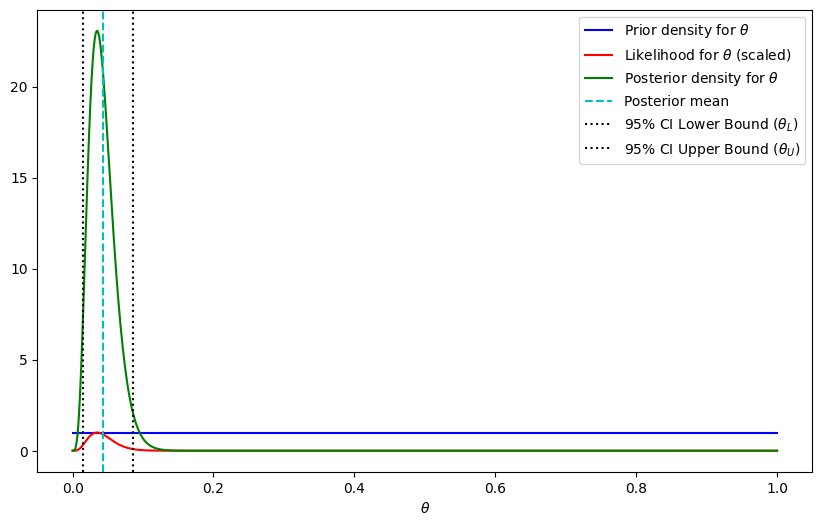

Posterior Mean: 0.0427
95% Credibility Interval: [0.0141, 0.0859]


In [14]:
# Given data
N = 115
y = 4

# Prior parameters (Uniform Beta(1,1))
a0 = 1
b0 = 1

# Posterior parameters
a = a0 + y
b = b0 + N - y

# Posterior mean
theta_post_mean = a / (a + b)

# Compute 95% credibility interval
credibility_interval = beta.ppf([0.025, 0.975], a, b)
theta_L, theta_U = credibility_interval

# Values of θ for visualization
thetas = np.linspace(0, 1, 1000)

# Compute prior, likelihood, and posterior
prior_density = beta.pdf(thetas, a0, b0)
likelihood = thetas**y * (1 - thetas)**(N - y)  # Proportional likelihood
posterior_density = beta.pdf(thetas, a, b)

# Normalize likelihood for plotting (optional)
likelihood /= np.max(likelihood)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(thetas, prior_density, label=r'Prior density for $\theta$', color='blue')
ax.plot(thetas, likelihood, label=r'Likelihood for $\theta$ (scaled)', color='red')
ax.plot(thetas, posterior_density, label=r'Posterior density for $\theta$', color='green')
ax.axvline(theta_post_mean, color='c', linestyle='--', label='Posterior mean')
ax.axvline(theta_L, color='black', linestyle=':', label=r'95% CI Lower Bound ($\theta_L$)')
ax.axvline(theta_U, color='black', linestyle=':', label=r'95% CI Upper Bound ($\theta_U$)')
ax.set_xlabel(r'$\theta$')
ax.legend()
plt.show()

print(f"Posterior Mean: {theta_post_mean:.4f}")
print(f"95% Credibility Interval: [{theta_L:.4f}, {theta_U:.4f}]")

In [15]:
summarize_posterior(N=115, y=4, a0=1, b0=1, interval_sizes=[50, 90, 95])

Data:           4 successes in 115 trials
Prior:          Beta(1,1)
Posterior:      Beta(5, 112)
Posterior mean: 0.04
50%-credibility interval: [0.03-0.05]
90%-credibility interval: [0.02-0.08]
95%-credibility interval: [0.01-0.09]



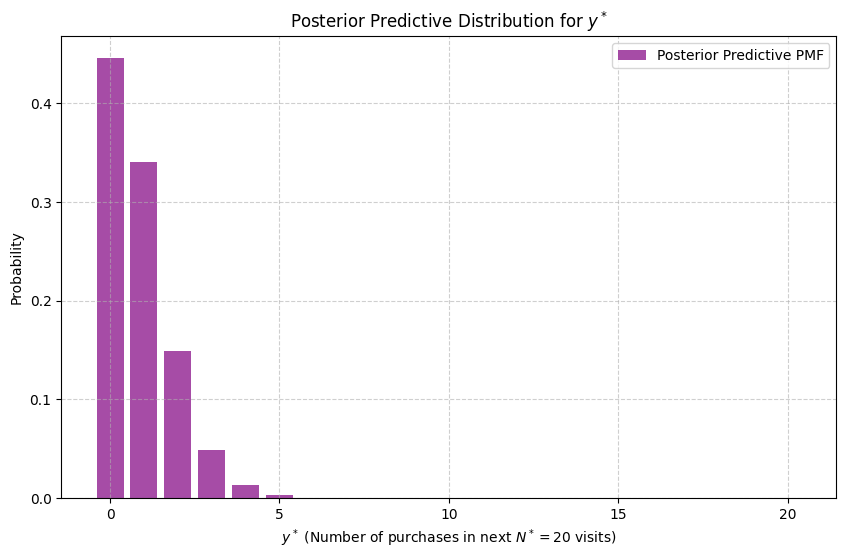

Most probable y*: 0


In [16]:
N_star = 20
y_star_values = np.arange(0, N_star + 1)
# Compute posterior predictive probabilities using Beta-Binomial distribution
posterior_predictive_pmf = betabinom.pmf(y_star_values, N_star, a, b)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(y_star_values, posterior_predictive_pmf, color='purple', alpha=0.7, label='Posterior Predictive PMF')
ax.set_xlabel(r'$y^*$ (Number of purchases in next $N^* = 20$ visits)')
ax.set_ylabel('Probability')
ax.set_title('Posterior Predictive Distribution for $y^*$')
ax.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Print the most probable y*
print(f"Most probable y*: {y_star_values[np.argmax(posterior_predictive_pmf)]}")

In [17]:
p_y_star_0 = betabinom.pmf(0, N_star, a, b)

# Compute P(y* >= 1 | y)
p_y_star_at_least_1 = 1 - p_y_star_0

# Print results
print(f"Probability that at least one of the next {N_star} customers makes a purchase: {p_y_star_at_least_1:.4f}")
print(f"Probability that none of the next {N_star} customers makes a purchase: {p_y_star_0:.4f}")

Probability that at least one of the next 20 customers makes a purchase: 0.5544
Probability that none of the next 20 customers makes a purchase: 0.4456


In [18]:
#epcexcattion of posterior predictive
posterior_predictive_expectation = y_star_values @ posterior_predictive_pmf
print(f'Posterior predictive expectation: {posterior_predictive_expectation:.2f}')

posterior_to_square = y_star_values**2 * posterior_predictive_pmf
posterior_predictive_variance_1 = posterior_to_square.sum() - posterior_predictive_expectation**2
print(f'Posterior predictive variance: {posterior_predictive_variance_1:.2f}')

# Compute the variance of the posterior predictive
posterior_predictive_variance = y_star_values**2 @ posterior_predictive_pmf - posterior_predictive_expectation**2
print(f'Posterior predictive variance: {posterior_predictive_variance:.2f}')

Posterior predictive expectation: 0.85
Posterior predictive variance: 0.95
Posterior predictive variance: 0.95
